
# Relocation between Neighborhoods in KSA Cities



## 1. Introduction

Kingdom of Saudi Arabia (KSA) is an Arab Islamic state, the largest country in the Arabian peninsula situated at the strategic crossroads of three continents Europe, Africa and Asia. It is a home to several human civilizations and the cradle of the heavenly messages. Capital of Saudi Arabia is Riyadh.

KSA is renowned for the sacred sites of Islam. The two Holy Mosques' of Makkah Al Mukarramah and Al Madinah Al Munawwarah are the destinations of millions of Muslims annually for Hajj and Umrah additionally they visit other significant sites of Islam.

KSA ranks first in production and reserves of petrol, fifth in natural gas reserves and tenth in natural gas production. Thousands of Muslims heads for the KSA for Hajj and Umrah and for visiting Makkah Al Mukarramah and Al Madinah Al Munawwarah, these visits necessitates provision of housing, catering and health services for the guests of Allah almighty. 

part of Saudi Vision 2030 opening Saudi Arabia further for business will boost productivity and smooth  journey to become one of the largest economies in the world. They improve business environment, restructure economic cities, create special zones and deregulate the energy market to make it more competitive.

The Saudi Human Resources Gateway is one of the major initiatives of HRDF that aims to create a leap forward in HR Management practice, to contribute to the progression of the HR practitioners and to form a knowledge database where establishments, HR practitioners and researchers can benefit from.
The HR Gateway aims to provide specialized, comprehensive, and free of charge Arabic HR content. Also it aims to offer HR practitioners an effective social platform as well as allowing them to have a reach to HR related contents, practicing it and modifying it to suit the company needs and share their experiences.

One of innovative services we can add to Saudi HR Gateway providing advising service for  people  to move and live in one of  KSA cities suitable and nicely and suitable .

### a) Problem Description:

Now let me explain the context of coursera Capstone project through a an example.  Fahed live on Al Wurud distrect which is a neighborhood in Jeddah city (one of KSA cities). Fahed love this  neighborhood, mainly because of all the great surrounding and enviormnent that exist in this neighborhood, such as burger joint, dessert shop, coffee shops,parks, pharmacies, graduate schools and so on. There are  lot of oppertunity and  job offer from a great company in Riyadh city (the capital of KSA) with great career prospects. However, given the far distance from his current place he unfortunately must move if he decide to accept the offer.

Wouldn't it be great if we are able to help Fahed or any similar person to determine neighborhoods on the other city that are the similar as the current neighborhood, and if not perhaps similar neighborhoods that are at least closer to his new job?

### b)  Objective

The aim of this report is to study and analyze the neighborhoods of both Jeddah and Riyadh cities and group them into similar clusters, to analyze those clusters to gather meaningful information. That information can be used to find out Riyadh neighborhoods that are same as current neighborhood in Jeddah or at least similar but . 

This will help any person decide to move from one city to another in same country or diffrent country

### c)  Target Audience

This information provided by this report would be useful for people who are interested in relocating to a different city  and are interested in finding new neighborhoods that are highly similar to their existing neighborhood.

## 2. Data Description & Preparation:
    
To consider the objective stated above, we can list the below data sources used for the analysis.
  - KSA Neighborhood Data ( regions, cities, and districts )
  - Get all venues in each districts (neighborhood) and its catagory  using  Fousquare API  


In [2]:
#starting notebook by importing all required lib.
import warnings
warnings.filterwarnings("ignore")

import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### a) KSA Neighborhood Data: 
The following github project (https://github.com/homaily/Saudi-Arabia-Regions-Cities-and-Districts/tree/master/json) contains Saudi Arabia Regions, Cities and Districts. The data is public data collected from https://maps.address.gov.sa/ as ,all coordinates in (Lat, Lon) aka (Y, X) format and 8 decimal points.
    Data points include:
        Regions, Cities and Districts.
        Names (Arabic & English).
        Regions capital city, population & center point.
        Regions boundaries.
        Districts boundaries.
This data divided into three parts:
- regions.json
- cities.json
- districts.json

Then information obtained will be transformed into a pandas data frame for further analysis.

#### KSA regions 

In [15]:
#Loading regions.json for extract KSA regions and explore it 

with open('ksa/regions.json', encoding="utf-8") as json_data:    
    country_data = json.load(json_data)
print('No of regon:',len(country_data) )

No of regon: 13


##### - KSA regions tabel 

In [4]:
#- Then convert json object of KSA regions to Pandas dataframe
country_regions= pd.DataFrame(columns= [ 'region_id', 'name_ar', 'name_en','population' , 'capital_city_id','Latitude', 'Longitude'] )

for i,data in enumerate (country_data):
    #print(i, end=' ')
    row=[]
    for c in country_regions.columns:
        if c == 'Latitude' :
            row.append(data['center'][0])    
        elif c== 'Longitude':  
            row.append(data['center'][1]) 
        else:
            row.append(data[c])    
    #print(row)
    country_regions.loc[len(country_regions)] = row
    
country_regions.head()

    

,region_id,name_ar,name_en,population,capital_city_id,Latitude,Longitude
0,1,منطقة الرياض,Riyadh,6777146,3,24.70000,46.73333
1,2,منطقة مكة المكرمة,Makkah,6915006,6,21.42718,39.84349
2,3,منطقة المدينة المنورة,Madinah,1777933,14,24.47058,39.60781
3,4,منطقة القصيم,Qassim,1215858,11,26.33034,43.97436
4,5,المنطقة الشرقية,Eastern Province,4105780,13,26.44199,50.10920


#### - KSA cities

In [17]:
#- Loading cities.json for extract KSA cities  and explore it 

with open('ksa/cities.json', encoding="utf-8") as json_data:    
    cities_data = json.load(json_data)
print('No of cities:',len(cities_data) )

No of cities: 3946


##### - KSA cities tabel

In [6]:
#### - Then convert json object of KSA cities to Pandas dataframe

country_cities= pd.DataFrame(columns= ['city_id', 'region_id', 'name_ar', 'name_en','Latitude', 'Longitude'] )


for data in cities_data:
    row=[]
    for c in country_cities.columns:
        if c == 'Latitude' :
            row.append(data['center'][0])    
  
        elif c== 'Longitude':
  
            row.append(data['center'][1]) 
        else:
            row.append(data[c])    
    #print(row)
    country_cities.loc[len(country_cities)] = row
    
country_cities.head()   

,city_id,region_id,name_ar,name_en,Latitude,Longitude
0,1,7,تبوك,Tabuk,28.41464,36.53387
1,2,7,نعمي,Na'mi,28.30508,35.74931
2,3,1,الرياض,Riyadh,24.70000,46.73333
3,4,7,حميط,Humayt,28.65152,35.38013
4,5,2,الطائف,At Taif,21.26848,40.41667


#### - KSA districts

In [19]:
#- Loading districts.json for extract KSA districts  and explore it 

with open('ksa/districts.json', encoding="utf-8") as json_data:    
    districts_data = json.load(json_data)
    
print('No of districts:',len(districts_data) )

No of districts: 2782


#### - Important transformation for data 
This file contan each district with boundaries points and there is no centeral location for  district
then I got all boundaries points Latitude & Longitude and caculate mean of then which give me centeral point of each district 

#### - KSA districts tabel

In [20]:
# - Then convert json object of KSA districts to Pandas dataframe

country_districts= pd.DataFrame(columns= ['district_id','city_id', 'region_id', 'name_ar', 'name_en','Latitude', 'Longitude', 'boundaries'] )

for data in districts_data:
    row=[]
    for c in country_districts.columns:
        if c == 'Latitude' :
            boundaries = np.array(data['boundaries'][0])
            center=boundaries.mean(axis=0 )
            #center=np.median(boundaries,axis=0 )
            row.append(center[0])   
            row.append(center[1])   

        elif c == 'Longitude' :
            None 
        elif c == 'boundaries' :
            row.append(boundaries)   

        else:
            row.append(data[c])    
        #print(row)

    country_districts.loc[len(country_districts)] = row
#print(center) # last center point 
#print(boundaries)    # last boundry

country_districts.rename(columns ={'name_en': 'Neighborhood'},inplace=True)   
country_districts.head()   

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
0,10100003001,3,1,حي العمل,Al Amal Dist.,24.644966,46.723598,"[[24.64900056, 46.7248791], [24.64742521, 46.7..."
1,10100003002,3,1,حي النموذجية,Al Namudhajiyah Dist.,24.655615,46.696523,"[[24.65018372, 46.70227584], [24.64939455, 46...."
2,10100003003,3,1,حي الجرادية,Al Jarradiyah Dist.,24.618815,46.696110,"[[24.61729504, 46.70655201], [24.61727163, 46...."
3,10100003004,3,1,حي الصناعية,Al Sinaiyah Dist.,24.646447,46.741675,"[[24.64061956, 46.75999871], [24.6342299, 46.7..."
4,10100003005,3,1,حي منفوحة الجديدة,Manfuha Al Jadidah Dist.,24.613354,46.716463,"[[24.61343234, 46.72718798], [24.61090205, 46...."


In [21]:
#Generic function to generate map using 
# create map of both cities 
def create_map( c_latitude, c_longitude, Latitude_list, Longitude_list,Neighborhood_list,name, zoom=12):
    # create map of New York using latitude and longitude values
    city_map = folium.Map(location=[c_latitude, c_longitude], zoom_start=zoom)
    print(name)
    # add markers to map
    for lat, lng,  neighborhood in zip(Latitude_list, Longitude_list,Neighborhood_list):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(city_map)  

    folium.CircleMarker(
        [c_latitude, c_longitude],
        radius=5,
        popup=folium.Popup(name, parse_html=True),
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(city_map)  
        
    return city_map

#### A sample for one district to test center and boundaries on the map shown below

In [22]:
#get one district to test center and boundaries on the map
country_districts[country_districts.district_id==10100003001]

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
0,10100003001,3,1,حي العمل,Al Amal Dist.,24.644966,46.723598,"[[24.64900056, 46.7248791], [24.64742521, 46.7..."


In [23]:
# Test create map for one district_id using  "center" and boundry points "boundaries"  

#get boundaries points of the district
boundaries= country_districts[country_districts.district_id==10100003001].boundaries
boundaries = np.array(boundaries[0])

#convert boundaries to DataFrame 
boundaries = pd.DataFrame( boundaries)
boundaries.columns=columns= ['Latitude','Longitude' ]
boundaries['Neighborhood']= 'points'

center_Lat= country_districts[country_districts.district_id==10100003001].Latitude.values[0]
center_Long= country_districts[country_districts.district_id==10100003001].Longitude.values[0]
district_name =  country_districts[country_districts.district_id==10100003001].Neighborhood.values[0]
distrect_map=create_map( center_Lat,center_Long ,boundaries['Latitude'],boundaries['Longitude'],
                        boundaries['Neighborhood'] ,district_name,14)
distrect_map

Al Amal Dist.


In [63]:
%%html
<p> loaded image just in case  folium map does not appears in gitgub </p>
<img src="img/image1.png",width=60,height=60>

**As shown the centeral of the district come in the middle of the boundaries points**

### b) Coordinate data for each Neighborhood in KSA Cities: 
    
All the venues in each neighborhood in the KSA cities will be collected from  Fousquare using  Fousquare API 
By using this api we will get all the venues in each neighborhood. We can filter these venues to get only two cities will be anlyzed.

#### - Define Person requirement to move from current city to new city 
We will define from and to city which defined by the person 
this can be the entry point for application which will advice person with best neighborhood/district in the new city match his current neighborhood/district in the current city:

In [25]:
from_city_id = 18   # for current city of person 
to_city_id = 3      # for new city will move to 
from_city_name=country_cities[country_cities.city_id==from_city_id].name_en.values[0]
to_city_name=country_cities[country_cities.city_id==to_city_id].name_en.values[0]
print('Person need to move from: ', from_city_name, 'city to : ' ,to_city_name ,' city')

Person need to move from:  Jeddah city to :  Riyadh  city


#### - Now will filter neighborhood/district of current and new city from the whole   country_districts dataframe

In [107]:
from_city_districts = country_districts[  country_districts.city_id==from_city_id ]
to_city_districts = country_districts[  country_districts.city_id==to_city_id ]
print(from_city_name,from_city_districts.shape[0],' districts')
print(to_city_name,to_city_districts.shape[0],' districts')

Jeddah 119  districts
Riyadh 187  districts


In [56]:
# create a function to draw current and new cities using generic create_map function  
def create_city_map(city_districts,city_id,city_name,zoom=12):
    #get city latitude, longitude
    center_Lat,center_Long = country_cities[country_cities.city_id==city_id].Latitude.values[0], \
                country_cities[country_cities.city_id==city_id].Longitude.values[0]
    
    created_map=create_map( center_Lat,center_Long ,city_districts['Latitude'],city_districts['Longitude'],
                        city_districts['Neighborhood'] ,city_name,zoom)
    return created_map

**Draw from city**

In [116]:
city_map=create_city_map(from_city_districts,from_city_id,from_city_name,10)
city_map

Jeddah


In [64]:
%%html
<p> loaded image just in case  folium map does not appears in gitgub </p>
<img src="img/image2.png",width=60,height=60>

**Draw to city**

In [115]:
city_map=create_city_map(to_city_districts,to_city_id,to_city_name,10)
city_map

Riyadh


In [65]:
%%html
<p> loaded image just in case  folium map does not appears in gitgub </p>
<img src="img/image3.png",width=60,height=60>

#### - Now combine two city to get all NearbyVenues for each neighborhood/district using foursquare API

In [137]:
combined_city_districts = pd.concat( [from_city_districts,to_city_districts])

#as disvovered many Neighborhood with same name in two cities added city_id as prefix to Neighborhood name  
combined_city_districts['Neighborhood'] =   combined_city_districts.city_id.astype(str)  +'_' + combined_city_districts.Neighborhood 

combined_city_districts.head()

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
627,10200018001,18,2,حي الزمرد,18_Az Zomorod Dist.,21.792042,39.042490,"[[21.80927021, 39.03429563], [21.81053914, 39...."
628,10200018002,18,2,حي اللؤلؤ,18_Al Loaloa Dist.,21.762660,39.052579,"[[21.74946321, 39.05707049], [21.74951489, 39...."
629,10200018003,18,2,حي الياقوت,18_Al Yaqoot Dist.,21.779845,39.074368,"[[21.7637526, 39.07722576], [21.7815796, 39.06..."
630,10200018004,18,2,حي الصوارى,18_As Swaryee Dist.,21.804336,39.110714,"[[21.79647589, 39.1222053], [21.78069932, 39.1..."
631,10200018005,18,2,حي الامواج,18_Al Amwaj Dist.,21.741037,39.063722,"[[21.73475579, 39.06916738], [21.73475841, 39...."


#### Define Foursquare Credentials and Version

In [120]:
CLIENT_ID = '5AHI1B14PNWWA3ZKPOQPLKSXRZ0P3OXLSUU1EMYDLVWWH1VY' # your Foursquare ID
CLIENT_SECRET = 'WSPO43X5JSJXEKH2F2X3MOUPFUQCBYLSY0WQYZL3FADJJAOR' # your Foursquare Secret
VERSION = '20180605'


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5AHI1B14PNWWA3ZKPOQPLKSXRZ0P3OXLSUU1EMYDLVWWH1VY
CLIENT_SECRET:WSPO43X5JSJXEKH2F2X3MOUPFUQCBYLSY0WQYZL3FADJJAOR


In [26]:
####  A function to repeat the same process to all the neighborhoods in each city

def getNearbyVenues(city_districts, LIMIT = 100,radius = 500):

    names=city_districts['Neighborhood']
    latitudes=city_districts['Latitude']
    longitudes=city_districts['Longitude']
    city_id = city_districts['city_id']
    venues_list=[]
    print('explore the following Neighborhoods:' , end=' ')

    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, end=',')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            city_id,  # adding city_id allows us seperate two cities later 
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

       
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'city_id', 
                  'Venue_id',                              
                  'Venue', 
                  'Latitude',  #Venue Latitude 
                  'Longitude',  #Venue Longitude
                  'Category']  #Venue Category
   
    return(nearby_venues)

#### Now call the foursquareAPI on each neighborhood to get all nearby venues
then store new dataframe locally on file to deal with limited number of API call of  foursquare  daily  

In [1]:
#### Now call the above function on each neighborhood and create a new dataframe called *_venues*,

combined_city_districts_venues=getNearbyVenues(combined_city_districts)
from openpyxl import load_workbook
combined_city_districts_venues.to_excel('combined_city_'+from_city_name+'_'+to_city_name+'_districts_venues.xlsx',index=False)


In [27]:
#### Start from here you can reload combined_city_Jeddah_Riyadh_districts_venues and resume program 

combined_city_districts_venues= pd.read_excel('combined_city_'+from_city_name+'_'+to_city_name+'_districts_venues.xlsx')

#### then drop null and explore data

In [28]:
#print(combined_city_districts_venues.shape)
combined_city_districts_venues.dropna(inplace=True)
#print(combined_city_districts_venues.shape)
combined_city_districts_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_id,Venue,Latitude,Longitude,Category,city_id
0,18_Az Zomorod Dist.,21.792042,39.04249,5a1d4f79c0af5707fbf8723a,Obhur,21.790107,39.042135,Beach,18
1,18_Az Zomorod Dist.,21.792042,39.04249,52c808e1498e4d3e96049621,Private Beach,21.793894,39.044243,Beach,18
2,18_Az Zomorod Dist.,21.792042,39.04249,5c053acad1a402002c4d683a,Boho The Beach,21.795712,39.043003,Beach,18
3,18_Az Zomorod Dist.,21.792042,39.04249,50c1f787e4b0757ad3b06704,Indigo,21.788826,39.044985,Resort,18
4,18_Az Zomorod Dist.,21.792042,39.04249,54134a91498e038f80469a59,Amaya,21.789050,39.045123,Restaurant,18


#### Now analyse  current and new cities by display  common venues catagories as shown below 

### - Data Analysis

####   - Common categories for  both cities

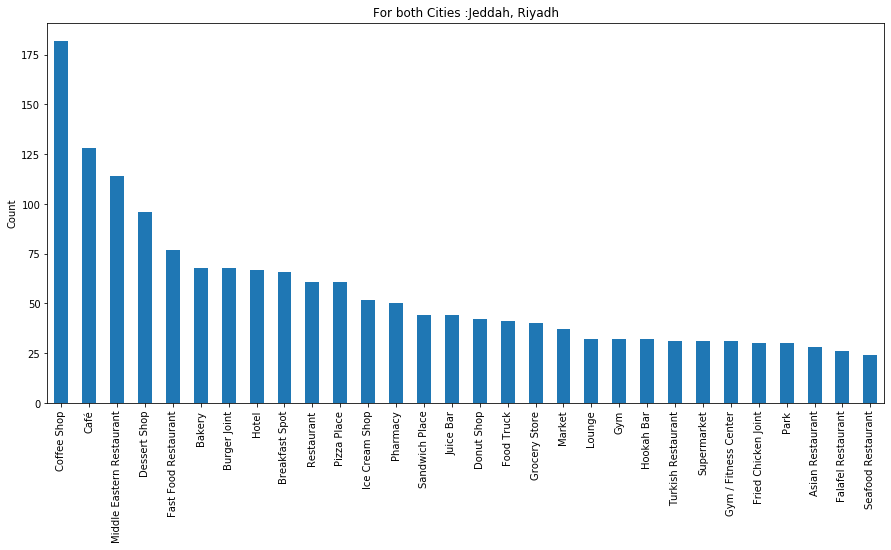

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

combined_city_districts_venues.Category.value_counts()[:30].plot.bar()
plt.title('For both Cities :'+ from_city_name + ', ' +to_city_name )
plt.ylabel('Count')
plt.show()

#### As shown most common categories in both cities:
- Coffee Shop                                 
- Café                                        
- Middle Eastern Restaurant                   
- Dessert Shop                                
- Bakery                                      


####  - Common categories for  new city

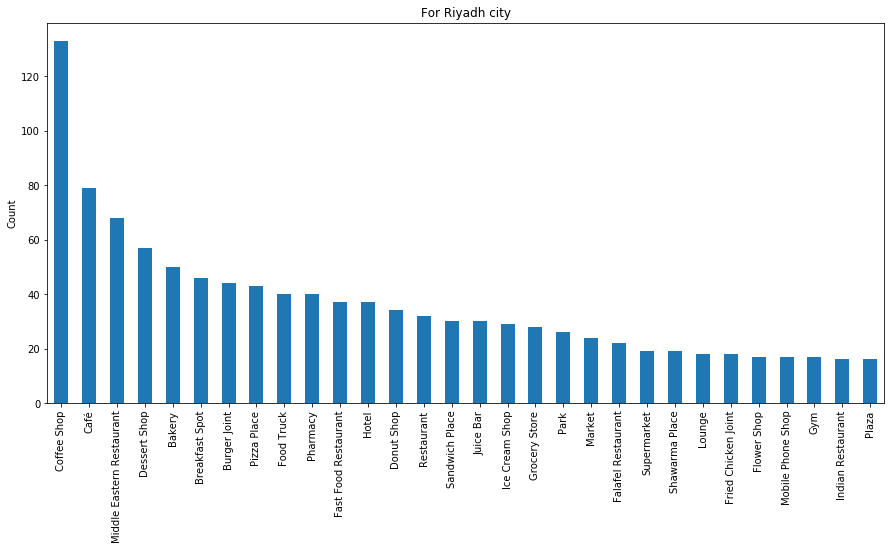

In [217]:
plt.figure(figsize=(15,7))
combined_city_districts_venues[combined_city_districts_venues.city_id==to_city_id].Category.value_counts()[:30].plot.bar()
plt.title('For '+to_city_name + ' city')
plt.ylabel('Count')
plt.show()

#### As shown most common categories  in new city:
- Coffee Shop                                 
- Café                                        
- Middle Eastern Restaurant                   
- Dessert Shop                                
- Bakery  

and as notes number of venues near from double of current catagory and this is becuse new city is the captial of KSA

#### - Then display  number of venues per Neighborhood for new  city 

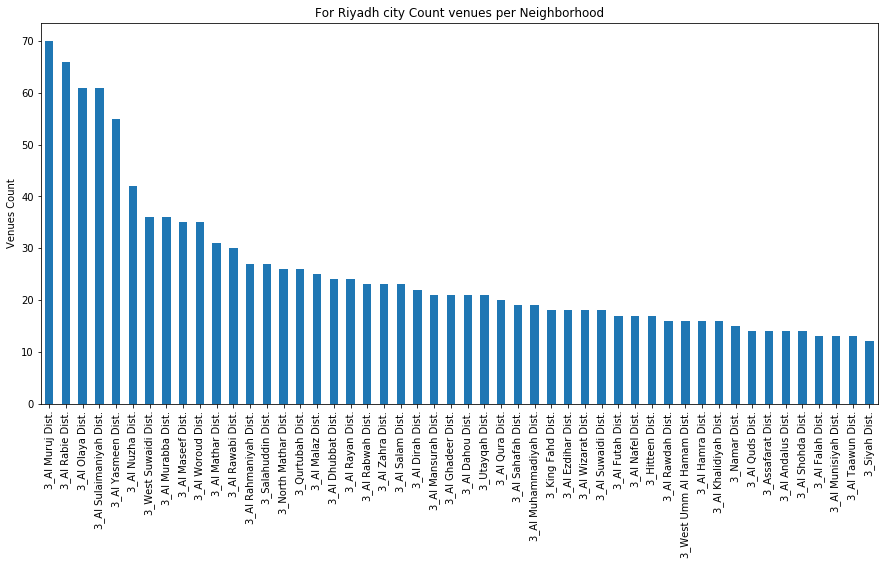

In [598]:
plt.figure(figsize=(15,7))
combined_city_districts_venues[combined_city_districts_venues.city_id==to_city_id].Neighborhood.value_counts()[:50].plot.bar()
plt.title('For '+to_city_name + ' city Count venues per Neighborhood')
plt.ylabel('Venues Count')
plt.show()

As shown in the above Figure most of Neighborhood with more than 30 venues are downtone Neighborhoods

####  - Common categories for  current city

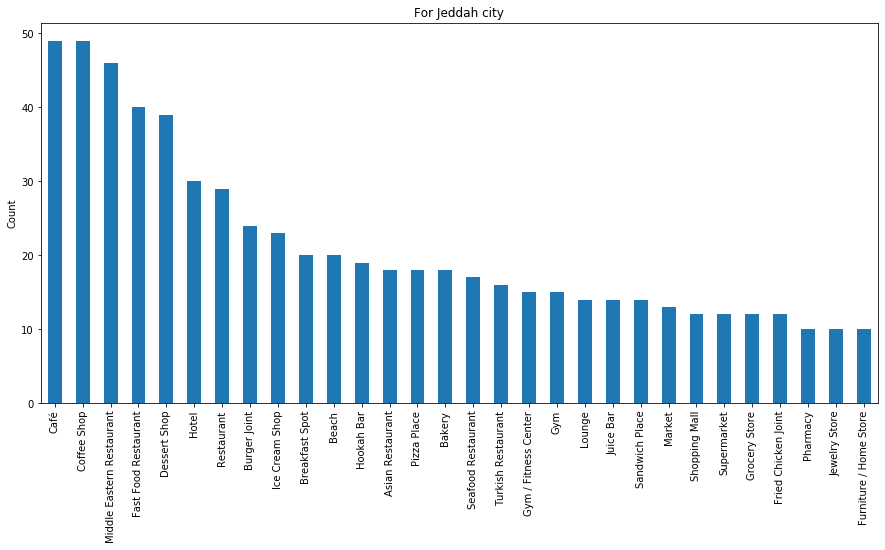

In [216]:
plt.figure(figsize=(15,7))
combined_city_districts_venues[combined_city_districts_venues.city_id==from_city_id].Category.value_counts()[:30].plot.bar()
plt.title('For '+from_city_name + ' city')
plt.ylabel('Count')
plt.show()

#### As shown most common categories  in current city:
- Coffee Shop                                 
- Café                                        
- Middle Eastern Restaurant   
- Fast Food    
- Dessert Shop                                
- Hotel  

and as notes there is ***Beach*** category appear in this city as its on Red Sea   

#### Now let us list the current Neighborhood catagories 

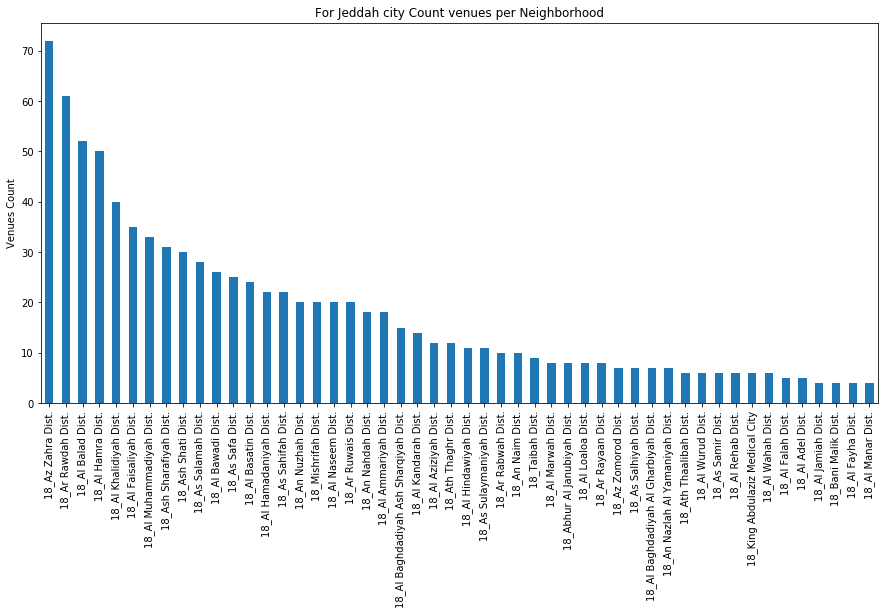

In [629]:
plt.figure(figsize=(15,7))
combined_city_districts_venues[combined_city_districts_venues.city_id==from_city_id].Neighborhood.value_counts()[:50].plot.bar()
plt.title('For '+from_city_name + ' city Count venues per Neighborhood')
plt.ylabel('Venues Count')
plt.show()

As shown in the above Figure most of Neighborhood with more than 30 venues are downtone Neighborhoods

In [628]:
#combined_city_districts_venues[(combined_city_districts_venues.city_id==from_city_id) & 
#                               (combined_city_districts_venues.Neighborhood==current_Neighborhood) ]

Now we are ready to move to next phase of project : ***Methodology*** to anlysis data and build suitable model 

## 3-Methodology

The following Figure define the overall steps from getting user input to display output to user for moving from current new city to new city   

In [150]:
%%html
<img src="img/Methodology.png",width=60,height=60>

*** Steps  1,2 already performed in Data Description & Preperatio phase***

### a ) Generate one-hot encoding for venues categories  
We use One Hot Encoding for venues categories, allow us group neighborhoods of both cities, and then find out the top ten venues categories present in each neighborhood.

In [35]:
# one hot encoding 
combined_city_onehot = pd.get_dummies(combined_city_districts_venues[['Category']], prefix="", prefix_sep="")
combined_city_onehot.head()
# add neighborhood column back to dataframe      
combined_city_onehot['Neighborhood'] =  combined_city_districts_venues['Neighborhood'] 
combined_city_onehot['city_id'] =  combined_city_districts_venues['city_id'] 

# move neighborhood & city_id columns to the first column
fixed_columns=list( combined_city_onehot.columns)
fixed_columns.remove('Neighborhood')
fixed_columns.remove('city_id')

fixed_columns =  ['Neighborhood','city_id'] + fixed_columns

combined_city_onehot = combined_city_onehot[fixed_columns]

#print('shape after onehot:',   combined_city_onehot.shape)

combined_city_onehot.head()

,Neighborhood,city_id,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Gate,Airport Lounge,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Bistro,Boat Rental,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Business Center,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cupcake Shop,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Knitting Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Motorsports Shop,Movie Theater,Moving Target,Music Store,Music Venue,National Park,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Supply Store,Outlet Mall,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Public Art,RV Park,Recreation Center,Rental Service,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Waterfront,Wedding Hall,Wings Joint,Women's Store,Yoga Studio
0,18_Az Zomorod Dist.,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

As shown the catagories become a columns 276 (be execluse Neighborhood and city_id) and each venues will be assigned each 1 or 0 for each catagory 

### b ) Group by neighborhoods and sum all venues categories 

as shown in above one-hot encodong tabel, there are number of recoreds for each Neighborhood (venues), now we will group data by Neighborhood to have one value between Neighborhood and catagory as shown below:

In [36]:
combined_city_grouped = combined_city_onehot.groupby('Neighborhood').sum().reset_index()

#this second grouping allow keep keeping city_id  
combined_city_grouped.city_id = combined_city_onehot.groupby('Neighborhood').city_id.mean().values

#print('shape after group:',   combined_city_grouped.shape)
combined_city_grouped.head()

,Neighborhood,city_id,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Gate,Airport Lounge,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auditorium,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Bistro,Boat Rental,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Business Center,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cupcake Shop,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Knitting Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Motorsports Shop,Movie Theater,Moving Target,Music Store,Music Venue,National Park,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Supply Store,Outlet Mall,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Public Art,RV Park,Recreation Center,Rental Service,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Waterfront,Wedding Hall,Wings Joint,Women's Store,Yoga Studio
0,18_Abhur Al Janubiyah Dist.,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0

As shown the rows become 221, which are number of Neighborhoods in both cities
and each Neighborhood row contains number for each catagory represent number of venues belong to this catagory in this area 

####  - Calculating most common venues catagories for each Neighborhood  
as shonw Neighborhood appears associated with most common categories sorted with most catagories first  

In [37]:
def return_most_common_venues(row, num_top_venues):
    
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    #print(num_top_venues)
    #print(row_categories_sorted.index.values[0:num_top_venues])
   
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city_id', 'Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#print(columns)
# create a new dataframe
combined_city_grouped_venues_sorted = pd.DataFrame(columns=columns)

combined_city_grouped_venues_sorted['Neighborhood'] = combined_city_grouped['Neighborhood']
combined_city_grouped_venues_sorted['city_id'] = combined_city_grouped['city_id']

for ind in np.arange(combined_city_grouped.shape[0]):
    combined_city_grouped_venues_sorted.iloc[ind, 2:] = return_most_common_venues(combined_city_grouped.iloc[ind, :], num_top_venues)

combined_city_grouped_venues_sorted.head()

,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,18,18_Abhur Al Janubiyah Dist.,Beach,Seafood Restaurant,Boat Rental,Fountain,Restaurant,Surf Spot,Yoga Studio,Filipino Restaurant,Farm,Farmers Market
1,18,18_Al Adel Dist.,Gym,Dessert Shop,Gym / Fitness Center,Arts & Crafts Store,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
2,18,18_Al Ajwad Dist.,Market,Hookah Bar,Burger Joint,Food Truck,Department Store,Dessert Shop,Food Service,Food Court,Food & Drink Shop,Food
3,18,18_Al Amir Fawaz Al Janouby Dist.,Trail,Mini Golf,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market
4,18,18_Al Amir Fawaz Ash Shamaly Dist.,Turkish Restaurant,Hospital,Seafood Restaurant,Yoga Studio,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant


### c ) Cluster neighborhoods by venues categories 


will use hierarchical clustering instead of k-mean, as hierarchical clustering has fewer assumptions about the distribution of your data - the only requirement (which k-means also shares) is that a distance can be calculated each pair of data points. Hierarchical clustering typically 'joins' nearby points into a cluster, and then successively adds nearby points to the nearest group. You end up with a 'dendrogram', or a sort of connectivity plot. You can use that plot to decide after the fact of how many clusters your data has, by cutting the dendrogram at different heights. Of course, if you need to pre-decide how many clusters you want (based on some sort of business need) you can do that too. Hierarchical clustering can be more computationally expensive but usually produces more intuitive results.

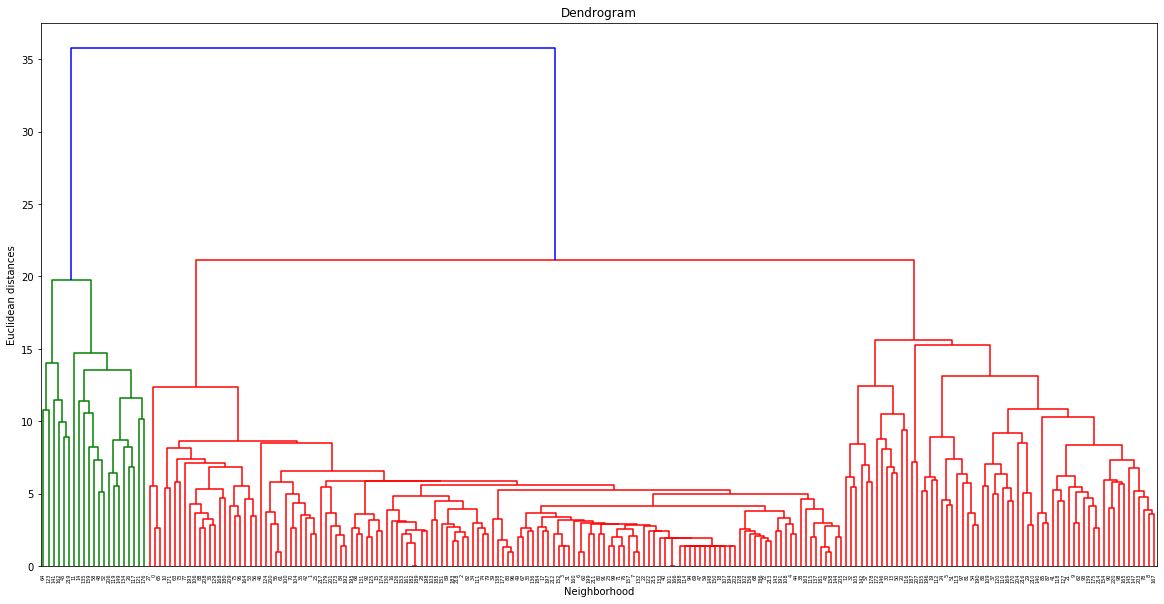

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

import scipy.cluster.hierarchy as sch
X = combined_city_grouped.iloc[:, 2: ].values
X.shape

#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X datasetdendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neighborhood')
plt.ylabel('Euclidean distances')
plt.show()

from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 50, affinity = 'euclidean', linkage ='ward')
labels_=hc.fit_predict(X)

combined_city_grouped_venues_sorted['Cluster']=labels_

As shown from the above dendrogram cutting at 50 clusters is more suitable which will make most of clusters Neighborhoods around 10 Neighborhoods 

#### As shown below table depicts the clustered data along with the top 10 most common venues catagoires in that cluster.

In [40]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
combined_city_grouped_venues_sorted.head()

,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,18,18_Abhur Al Janubiyah Dist.,Beach,Seafood Restaurant,Boat Rental,Fountain,Restaurant,Surf Spot,Yoga Studio,Filipino Restaurant,Farm,Farmers Market,24
1,18,18_Al Adel Dist.,Gym,Dessert Shop,Gym / Fitness Center,Arts & Crafts Store,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,11
2,18,18_Al Ajwad Dist.,Market,Hookah Bar,Burger Joint,Food Truck,Department Store,Dessert Shop,Food Service,Food Court,Food & Drink Shop,Food,12
3,18,18_Al Amir Fawaz Al Janouby Dist.,Trail,Mini Golf,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,12
4,18,18_Al Amir Fawaz Ash Shamaly Dist.,Turkish Restaurant,Hospital,Seafood Restaurant,Yoga Studio,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,12


In [41]:
#combined_city_grouped_venues_sorted.Cluster.value_counts().head(10)

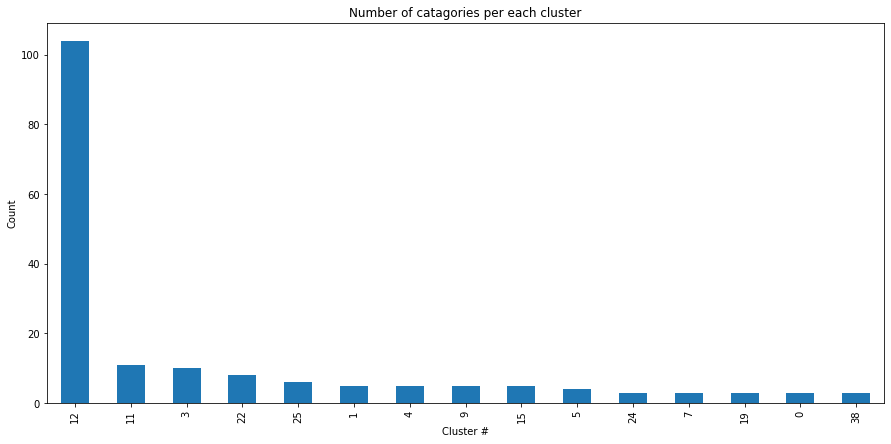

In [42]:
plt.figure(figsize=(15,7))
combined_city_grouped_venues_sorted.Cluster.value_counts().head(15).plot.bar()
plt.title('Number of catagories per each cluster')
plt.xlabel('Cluster #')
plt.ylabel('Count')

plt.show()

### Display most common categories in cluster

In [43]:
#this function will count Most Common Venues 1--> 10 
def most_common_catagory_in_cluster(data,top=10):
    ven = []
    for i in range(2,12): # from 1st Most Common Venue to 10th  Most Common Venue 
        #print(i,data.columns[i],list(data[data.columns[i]]))
        ven= ven+ list(data[data.columns[i]]) # add all Venues in one list  
        
    ven = pd.DataFrame({'Venue':ven})
    return ven.Venue.value_counts().head(top) # return most 5 Venues

In [44]:
from IPython.display import display, HTML

mcc_in_cluster = pd.DataFrame()

for c  in combined_city_grouped_venues_sorted.Cluster.value_counts().index[:5]:
    cluster_data = combined_city_grouped_venues_sorted[combined_city_grouped_venues_sorted.Cluster==c]

    display(HTML('<h3><center> Cluster:' +str(c) +  '</center></h3>'))
    display(HTML('<h4> - First 5 Neighborhoods in this cluster</h4>'))

    display(cluster_data.head())
    
    display(HTML('<h4> - The most five common categories in this cluster</h4>'))
    #print(most_common_catagory_in_cluster(cluster_data,5) )    
    #display data formated in Panda DatFarme
    
    p = pd.DataFrame(most_common_catagory_in_cluster(cluster_data,5).reset_index() )
    p.columns=['Catagory', 'Count']
    display(p.head())

    mcc_in_cluster['cluster:'+ str(c)]= most_common_catagory_in_cluster(cluster_data,5).index 
    
    display(HTML('<h4> - The number of  Neighborhoods per each city in this cluster</h4>'))
    #print( cluster_data.city_id.value_counts())
    
    #display data formated in  DataFarme
    p = pd.DataFrame(cluster_data.city_id.value_counts().reset_index() )
    p.columns=['City', 'Count']
    display(p.head())
    
    
    display(HTML('<hr>'))


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
2,18,18_Al Ajwad Dist.,Market,Hookah Bar,Burger Joint,Food Truck,Department Store,Dessert Shop,Food Service,Food Court,Food & Drink Shop,Food,12
3,18,18_Al Amir Fawaz Al Janouby Dist.,Trail,Mini Golf,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,12
4,18,18_Al Amir Fawaz Ash Shamaly Dist.,Turkish Restaurant,Hospital,Seafood Restaurant,Yoga Studio,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,12
6,18,18_Al Amwaj Dist.,Beach,Yoga Studio,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,12
7,18,18_Al Andalus Dist.,Spa,Pizza Place,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,12


,Catagory,Count
0,Fast Food Restaurant,84
1,Farm,82
2,Farmers Market,81
3,Falafel Restaurant,75
4,Filipino Restaurant,70


,City,Count
0,3,73
1,18,31


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
1,18,18_Al Adel Dist.,Gym,Dessert Shop,Gym / Fitness Center,Arts & Crafts Store,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,11
25,18,18_Al Kawthar Dist.,Gym / Fitness Center,Café,Dessert Shop,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,11
35,18,18_Al Wahah Dist.,Burger Joint,Turkish Restaurant,Gym / Fitness Center,Bathing Area,Bar,Yoga Studio,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,11
42,18,18_Ar Rabwah Dist.,Gym / Fitness Center,Market,Café,Pharmacy,African Restaurant,Hookah Bar,American Restaurant,Gym,Burger Joint,Fast Food Restaurant,11
55,18,18_As Sororyah Dist.,Furniture / Home Store,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Yoga Studio,Exhibit,11


,Catagory,Count
0,Fast Food Restaurant,7
1,Fish & Chips Shop,6
2,Farm,6
3,Fish Market,6
4,Farmers Market,5


,City,Count
0,18,7
1,3,4


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
9,18,18_Al Baghdadiyah Al Gharbiyah Dist.,Hotel,Seafood Restaurant,Ice Cream Shop,Supermarket,Café,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,3
21,18,18_Al Hindawiyah Dist.,African Restaurant,Food,Coffee Shop,Hotel,Afghan Restaurant,Snack Place,American Restaurant,Breakfast Spot,Fast Food Restaurant,Farm,3
41,18,18_An Nuzhah Dist.,Hotel,Pizza Place,Moving Target,Intersection,Bridal Shop,Grocery Store,Clothing Store,Trail,Coffee Shop,Discount Store,3
62,18,18_Ath Thaalibah Dist.,Coffee Shop,Seafood Restaurant,Hotel,Restaurant,Filipino Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,3
93,3,3_Al Falah Dist.,Coffee Shop,Hotel,Grocery Store,Donut Shop,Theater,Convenience Store,Food Court,Heliport,Salon / Barbershop,Fast Food Restaurant,3


,Catagory,Count
0,Coffee Shop,9
1,Hotel,6
2,Fast Food Restaurant,6
3,Farm,5
4,Farmers Market,4


,City,Count
0,3,6
1,18,4


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
36,18,18_Al Wurud Dist.,Hotel,Department Store,Bed & Breakfast,Park,Asian Restaurant,Middle Eastern Restaurant,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,22
88,3,3_Al Dubiyah Dist.,Coffee Shop,Flower Shop,Park,Pet Store,Pakistani Restaurant,Flea Market,Food,Fish Market,Fish & Chips Shop,Event Space,22
106,3,3_Al Khuzama Dist.,Park,Stables,Farm,Vacation Rental,Fast Food Restaurant,Yoga Studio,Filipino Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,22
129,3,3_Al Nakheel Dist.,Park,Middle Eastern Restaurant,Grocery Store,Pharmacy,Burger Joint,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,22
168,3,3_Al Wahah Dist.,Lounge,Hookah Bar,Restaurant,Park,Trail,Gym / Fitness Center,Yoga Studio,Farm,Exhibit,Fabric Shop,22


,Catagory,Count
0,Park,8
1,Yoga Studio,5
2,Fast Food Restaurant,4
3,Farmers Market,4
4,Grocery Store,3


,City,Count
0,3,7
1,18,1


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
53,18,18_As Salhiyah Dist.,Fast Food Restaurant,Music Venue,Dessert Shop,Campground,Bus Station,Tram Station,Yoga Studio,Filipino Restaurant,Farm,Farmers Market,25
56,18,18_As Sulaymaniyah Dist.,Fast Food Restaurant,Ice Cream Shop,Grocery Store,Falafel Restaurant,Burger Joint,Trail,Middle Eastern Restaurant,Dessert Shop,Pharmacy,Wings Joint,25
75,18,18_Taibah Dist.,Pizza Place,Fast Food Restaurant,Turkish Restaurant,Juice Bar,Pharmacy,Dessert Shop,Doner Restaurant,Falafel Restaurant,Farm,Farmers Market,25
95,3,3_Al Fayha Dist.,Juice Bar,Pizza Place,Middle Eastern Restaurant,Burger Joint,Fast Food Restaurant,Supermarket,Donut Shop,Turkish Restaurant,Breakfast Spot,Falafel Restaurant,25
164,3,3_Al Suwaidi Dist.,Fast Food Restaurant,Burger Joint,Ice Cream Shop,Middle Eastern Restaurant,Pet Store,Convenience Store,Park,Candy Store,Breakfast Spot,Bowling Alley,25


,Catagory,Count
0,Fast Food Restaurant,5
1,Middle Eastern Restaurant,4
2,Juice Bar,3
3,Burger Joint,3
4,Farmers Market,3


,City,Count
0,3,3
1,18,3


### The summary of most common catagories for first 5 clusters

In [541]:
mcc_in_cluster

,cluster:12,cluster:11,cluster:3,cluster:22,cluster:25
0,Fast Food Restaurant,Fast Food Restaurant,Coffee Shop,Park,Fast Food Restaurant
1,Farm,Fish Market,Hotel,Yoga Studio,Middle Eastern Restaurant
2,Farmers Market,Fish & Chips Shop,Fast Food Restaurant,Fast Food Restaurant,Burger Joint
3,Falafel Restaurant,Farm,Farm,Farmers Market,Dessert Shop
4,Filipino Restaurant,Farmers Market,Grocery Store,Farm,Juice Bar


## 4-Results

### a) Identify user cluster  by get cluster of current neighborhood current city  
After get the current neighborhood in current city, will display this neighborhood associted with  Most Common catagory and cluster number

In [47]:
#user will enter his Neighborhood in first city, then we will advice him with list of Neighborhoods in other city similar to his one

#city=18

current_Neighborhood = '18_Taibah Dist.' #'18_Taibah Dist.'

Neighborhood_cluster=combined_city_grouped_venues_sorted[combined_city_grouped_venues_sorted.Neighborhood==current_Neighborhood ].Cluster.values[0]
combined_city_grouped_venues_sorted[combined_city_grouped_venues_sorted.Neighborhood==current_Neighborhood ]

,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
75,18,18_Taibah Dist.,Pizza Place,Fast Food Restaurant,Turkish Restaurant,Juice Bar,Pharmacy,Dessert Shop,Doner Restaurant,Falafel Restaurant,Farm,Farmers Market,25


### b) Extract all neighborhoods in new city for the user cluster and rank them with nearest categories


In [48]:
print(Neighborhood_cluster)
candidate_Neighborhoods= combined_city_grouped_venues_sorted[ (combined_city_grouped_venues_sorted.Cluster==Neighborhood_cluster) &   (combined_city_grouped_venues_sorted.city_id !=from_city_id) ]
candidate_Neighborhoods.head()

25


,city_id,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
95,3,3_Al Fayha Dist.,Juice Bar,Pizza Place,Middle Eastern Restaurant,Burger Joint,Fast Food Restaurant,Supermarket,Donut Shop,Turkish Restaurant,Breakfast Spot,Falafel Restaurant,25
164,3,3_Al Suwaidi Dist.,Fast Food Restaurant,Burger Joint,Ice Cream Shop,Middle Eastern Restaurant,Pet Store,Convenience Store,Park,Candy Store,Breakfast Spot,Bowling Alley,25
209,3,3_Shubra Dist.,Food Truck,Shawarma Place,Bakery,Restaurant,Gym,Gym / Fitness Center,Supermarket,Juice Bar,Farmers Market,Middle Eastern Restaurant,25


### d) Display all extracted neighborhoods of new City ranked  
as shown list all candidate Neighborhoods name in the new city ranked with most similar Neighborhoods


In [49]:
#for cn in candidate_Neighborhoods.Neighborhood.values:
#    print(cn)

In [50]:
#get current and new Neighborhoods data (catagories values)
current_Neighborhood_data= combined_city_grouped[combined_city_grouped.Neighborhood==current_Neighborhood ]
candidate_Neighborhoods_data= combined_city_grouped[ combined_city_grouped.Neighborhood.isin(candidate_Neighborhoods.Neighborhood.values)  ]

#display display with all new city Neighborhoods
#candidate_Neighborhoods_data= combined_city_grouped[ combined_city_grouped.city_id==to_city_id  ]

#print(candidate_Neighborhoods_data.shape)
from sklearn.metrics.pairwise import euclidean_distances

#caculate diatnce between current Neighborhood and all candidate_Neighborhoods
dist = euclidean_distances(current_Neighborhood_data.iloc[:, 2:], candidate_Neighborhoods_data.iloc[:, 2:])
#print( len(dist[0] ))

# format data as DataFrame
print('Nesrest Neighborhoods for ',current_Neighborhood)
p = pd.DataFrame()
p['candidate_Neighborhoods']  =candidate_Neighborhoods_data.Neighborhood.values
p['similarity']  = 1/dist[0]

p.sort_values('similarity', ascending=False).head(10)

Nesrest Neighborhoods for  18_Taibah Dist.


,candidate_Neighborhoods,similarity
0,3_Al Fayha Dist.,0.288675
2,3_Shubra Dist.,0.235702
1,3_Al Suwaidi Dist.,0.200000


#### The Customer cam now see the candidate Neighborhoods on the map as following

In [59]:
new_locations = combined_city_districts_venues[combined_city_districts_venues['Neighborhood'].isin (candidate_Neighborhoods.Neighborhood.values)]
new_locations = new_locations[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']]
new_locations.drop_duplicates(inplace=True)
new_locations.rename(columns ={'Neighborhood Latitude': 'Latitude','Neighborhood Longitude':'Longitude'},inplace=True)
new_locations
#location of new Neighborhoods in other city 

city_map=create_city_map(new_locations,to_city_id,to_city_name,10)
city_map

Riyadh


In [66]:
%%html
<p> loaded image just in case  folium map does not appears in gitgub </p>
<img src="img/image4.png",width=60,height=60>

### c) most common categories of the user cluster
Extract most 10 common categories for the user cluster &  display it

In [52]:
most_common_catagory_in_cluster(cluster_data,15)

Fast Food Restaurant         5
Middle Eastern Restaurant    4
Juice Bar                    3
Burger Joint                 3
Farmers Market               3
Dessert Shop                 3
Falafel Restaurant           3
Supermarket                  2
Ice Cream Shop               2
Pizza Place                  2
Breakfast Spot               2
Turkish Restaurant           2
Farm                         2
Pharmacy                     2
Bakery                       1
Name: Venue, dtype: int64

## 5-Discussion 

The intent with which analysis was carried out was to find out similar neighborhoods for a person relocating from current city to new city.

As we analyze the results section, we can analyze the clusters and see similar neighborhoods in the new city. as the example we have, if we compare the Current Neighborhood with the best candidate Neighborhood in the same cluster .

#### List 1: the Current Neighborhood: "18_Taibah Dist." and list of nearest venues catagories

In [53]:
def display_Neighborhoods(data,display=10):
    data = data.iloc[:, 2:].T
    data.columns=['catagory']
    print(data.sort_values('catagory', ascending= False).head(display)  )   

display_Neighborhoods(combined_city_grouped[(combined_city_grouped.city_id==from_city_id) & 
                               (combined_city_grouped.Neighborhood==current_Neighborhood)] ,7)    


                      catagory
Fast Food Restaurant         2
Pizza Place                  2
Dessert Shop                 1
Juice Bar                    1
Pharmacy                     1
Doner Restaurant             1
Turkish Restaurant           1


#### List 2: the  best candidate Neighborhood ('3_Al Fayha Dist.') and list of nearest venues catagories
The  Neighborhood '3_Al Fayha Dist.' selected as it has the best similarity score 0.288675 as shown above

In [54]:

best_candidate_Neighborhood = '3_Al Fayha Dist.'
display_Neighborhoods(combined_city_grouped[(combined_city_grouped.city_id==to_city_id) & 
                               (combined_city_grouped.Neighborhood==best_candidate_Neighborhood)],10)    


                           catagory
Juice Bar                         2
Turkish Restaurant                1
Donut Shop                        1
Middle Eastern Restaurant         1
Falafel Restaurant                1
Supermarket                       1
Burger Joint                      1
Fast Food Restaurant              1
Pizza Place                       1
Breakfast Spot                    1


As seen in the above List 1,2 current & the  best candidate Neighborhoods have a lot of similar venues catagories: 
- Fast Food Restaurant 
- Pizza Place 
- Juice Bar
- Turkish Restaurant   

If a person’s current location were in the Neighborhood of 18_Taibah District in in Jedda city, which has venues like Fast Food, Pizza, Juice Bar and Turkish Restaurant nearby, the person, would like to relocate to a neighborhood like Fayha District in Riyadh city which also has venues like Fast Food, Pizza, Juice Bar and Turkish Restaurant nearby. This is just one example of how our data analysis can help people relocate from one city to another which similar to their current localities.

## 6-Conclusion

In a fast moving world, there are many real life problems or scenarios where data can be used to find solutions to those problems. Like seen in the example above, data was used to cluster neighborhoods in KAS cities based on the most common venues in those neighborhoods. Similarly, data can also be used to solve other problems, which most people face in metropolitan cities.